<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/AprendizajeAutomatico/TP0/TP0_MLmmora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matemáticas para Ciencias de los Datos:
# Trabajo práctico 4

- Professor: M.Sc.Saul Calderon.

- Students: 
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 
    - María Auxiliadora Mora, Instituto Tecnológico de Costa Rica  

- June 15th, 2019   

In [0]:
# Libraries required for the exercises
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

from pandas import Timestamp
import pandas as pd



# 1. La convolución en una dimensión (100 puntos)
1.1. (60 puntos) Implemente la función y = convolucionar1D(u, f ) la cual implemente la convolución en una dimensión

In [2]:
# Exercise 1.a.1

def plot_data(df):
    plt.plot(df)
    plt.show()

def umbralizar(y,threshold):
    signal = y
    signal[signal > threshold] =1 
    signal[signal <= threshold] =0 
    return signal 


def exercise_1_a_1(f, u):
  """
  Graph the data in speed.csv.
  """ 
  def convolucionar1D(u, f ):
     # Calculate the convolution of a signal an a kernel.
     # Parameters:
     #   u: the signal (a numpy array).
     #   f: the kernel (a numpy array).
     # Returns:
     #   the convolution result in an array.
               
     #stackerdSignal is a matrix with u values zero padded at the beginning / row
     # Example if u = [1,2,3,3]
     # stackedSignal = [1,2,3,3]
     #                 [0,1,2,3]
     #                 [0,0,1,2]
     #                 [0,0,0,1]
     stackedSignal = u
     for x in range(len(u)-1):
        signal1 = np.resize(np.pad(u, (x+1, 0), 'constant'),len(u))
        stackedSignal = np.vstack((stackedSignal, signal1))   

     #zero pad the kernel f to calculate the dot product  
     f = np.pad(f, (0, len(u)-len(f)), 'constant') 
   
     convResult = f.dot(stackedSignal)
     return (convResult) 
  
  #Convolution   
  convResult = convolucionar1D(u, f )  
  
  #Plot result
  plot_data(convResult)  
  return convResult


#Read, process and plot data
df = pd.read_csv('src/speedT.csv')
#Convert dato to a vecctor
u = df.values.transpose().reshape((df.shape[0],))  
plot_data(u)

#Exercise 1.a.2. First convolution test using f=[1,1,1,1,1,1,1m] with m=7
f = np.array([ 1, 1, 1, 1, 1, 1, 1])
print("Plot speed signal convolution with filter f=[1,1,1,1,1,1,1]")
convResult = conResult = exercise_1_a_1(f,u)

#Exercise 1.a.2. Second convolution test using f=[1,1m] with m=2
f = np.array([ 1, 1])
print("Plot speed signal convolution with filter f=[1,1]")
convResult = exercise_1_a_1(f,u)

#Exercise 1.a.2. Third convolution test using the filter [-a 0 a]  with a =1 
f = np.array([ -1, 0, 1])
print("Plot speed signal convolution with filter f=[-1,0,1]")
convResult = exercise_1_a_1(f,u)

#Exercise 1.a.3. Fourth convolution test using the filter [-a 0 a]  with a =2 
f = np.array([ -2, 0, 2])
print("Plot speed signal convolution with filter f=[-2,0,2]")
convResult = exercise_1_a_1(f,u)

umbralConvResult = umbralizar(convResult, 0.5)
plot_data(umbralConvResult)


FileNotFoundError: ignored

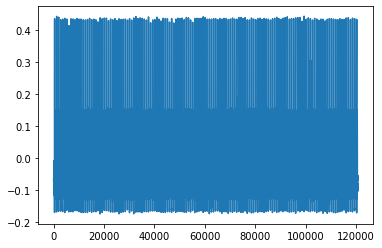

shape (120797,)


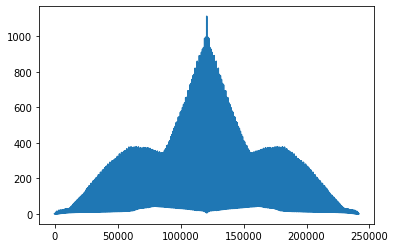

In [0]:
# Exercise 1.a.2.  Basado en la función y = convolucionar1D(u, f) implemente la función y = autocorrelacionar(u)

def autocorrelacionar(u):
     # Calculate the cross correlation of a signal using the dot product.
     #     At each iteration the fuction fills with a zero the end of vector u (the new signal f)
     #     a removes the first element of f.
     #     Then it computes the dot product of u and the new signal f.
     # Example if u = [1,2,3,3]       
     #    Iteration 1=>  f=[1,2,3,3]
     #    Iteration 2=>  f=[2,3,3,0]
     #    Iteration 3=>  f=[3,3,0,0]
     #              4=>  f=[3,0,0,0]   
     # Parameters:
     #   u: the signal (a numpy array).
     # Returns:
     #   the cross correlation result in an array.
           
     crossCorrResult = np.zeros(u.shape[0])  # To store the cross correlation result

     signal1 = u
     #Compute the first element of the result vector. 
     crossCorrResult[0] = u.dot(signal1)     
        
     for x in range(len(u)-1):      
        signal1 = (np.pad(signal1, (0, x+1), 'constant')[1:u.shape[0]+1])
        #print("procesando",x)
        crossCorrResult[x+1] = u.dot(signal1)     

     # Return cross correlation
     a=np.flip(crossCorrResult,0)[0:u.shape[0]-1]
     crossCorrResult=np.hstack((a,crossCorrResult))
     return crossCorrResult 
  
#Exercise 1.a.2.1
#Grafique la señal leída del archivo ecg1.csv y muéstrela en el reporte.

#Read data
df = pd.read_csv('src/ecg1.csv')
plot_data(df)


#Exercise 1.a.2.2
#Convert DataFrame to a vector
u = df.values.transpose().reshape((df.shape[0],))  

#Test cross correlation with te elctro signal. 
print("shape", u.shape)
crossCorrResult = autocorrelacionar(u)  

plot_data(crossCorrResult)


In [0]:
print(np.correlation(u,u))

AttributeError: module 'numpy' has no attribute 'correlation'

# 2. La convolución en dos dimensiones (20 puntos)

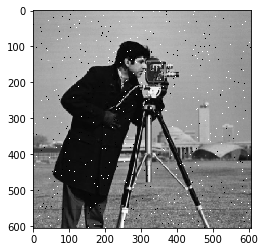

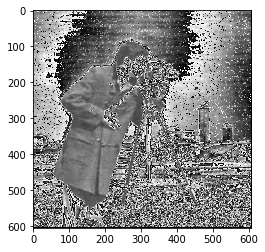

In [0]:
# a.1 and a.2 Implemente la función  convolucionar2D(U,F) 

def convolucionar2d(U, F):
    # Calculate the convolution of an image an a kernel without zero padding.
    # Parameters:
    #   U: a numpy image.
    #   F: a numpy array.
    # Returns:
    #   the convolution result in an array of size U.
    
    convResult = np.zeros_like(U)       # convolution result
    kernelx = kernel.shape[0]
    kernely = kernel.shape[1]
    
    # Loop over the image size
    for y in range(U.shape[1]):     
        for x in range(U.shape[0]):
            # if the image window has the right dimension
            #element-wise multiplication of the kernel and the image window.
            UWindow= U[x:x+kernelx,y:y+kernely]
            if UWindow.shape[0] == kernelx and UWindow.shape[1] == kernely:
               convResult[x,y]=(kernel*UWindow).sum()
    return convResult

#Open and display the image
img = io.imread('src/noisy.bmp')    # Load the image
#img = color.rgb2gray(img)           # Convert the image to grayscale (1 channel)
#plt.imshow(img, cmap='gray')
plt.imshow(img, cmap='gray')

plt.show()

# Convolve one kernel and the image
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
image_sharpened = convolucionar2d(img,kernel)
plt.imshow(image_sharpened, cmap='gray')


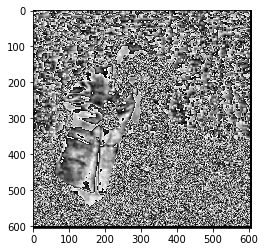

In [0]:
# Convolve the second kernel and the image
kernel = np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])
image_sharpened2 = convolucionar2d(img,kernel)

plt.imshow(image_sharpened2, cmap='gray')


Error cuadrado U1 18617363.1745
Error cuadrado U2 19387189.6164


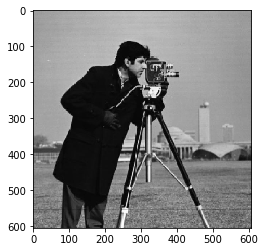

In [0]:
# a.1.3 Compare cuantitativemente el resultado de aplicar ambos filtros, usando el error medio cuadrático.

def squareError(imgConvolved, imgOriginal): 
    return (np.square(imgConvolved - imgOriginal)/(imgOriginal.shape[0]*imgOriginal[1]) ).sum()  

#Open and display the image
imgOriginal = io.imread('src/original.JPG')    # Load the image
imgOriginal = color.rgb2gray(imgOriginal)       # Convert the image to grayscale (1 channel)
plt.imshow(imgOriginal, cmap='gray')

#Error e1

e1 = squareError (image_sharpened,imgOriginal)
e2 = squareError (image_sharpened2,imgOriginal)

print("Error cuadrado U1", e1)
print("Error cuadrado U2", e2)
